In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pickle
from torch.utils.data import TensorDataset, DataLoader
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# local imports
import dihedral_opt_program
from src.nn_training import Group, plot_schatten_norm_sums_and_loss, net_schatten_norm
from src.nn_training import g_net, conv_net, fc_net, relu_g_net, relu_conv_net, relu_fc_net
torch.__version__

'1.10.2'

In [2]:
def get_training_dataframes(experiment_name, force_train):
    if not force_train:
        try:
            with open(f'data/training/{experiment_name}.pickle', 'rb') as f:
                dfs = pickle.load(f)
        except:
            print('Will train before plotting.')
            dfs = {}  # if training has not been done yet
    else:
            print('Will train before plotting.')
            dfs = {}
    return dfs

def postprocess_fn(x):
    return x

#### D8 G-CNN and 2 columns of the D8 DFT matrix

input: tensor([[ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j],
        [ 1.-0.j,  1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j, -1.-0.j,  1.-0.j,  1.-0.j]])
tensor(5.6569)
Will train before plotting.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-24.7657],
        [ 24.7049]], grad_fn=<MmBackward0>)
<class 'src.nn_training.conv_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-19.8681],
        [ 18.3782]], grad_fn=<MmBackward0>)
<class 'src.nn_training.g_net'> did not converge 0 times to get 1 successes.


  0%|          | 0/1 [00:00<?, ?it/s]

tensor([[-24.2737],
        [ 24.2865]], grad_fn=<MmBackward0>)
<class 'src.nn_training.fc_net'> did not converge 0 times to get 1 successes.


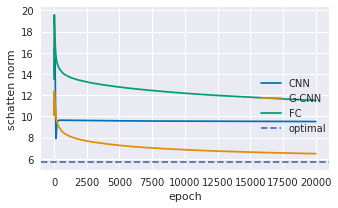

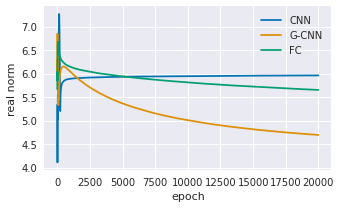

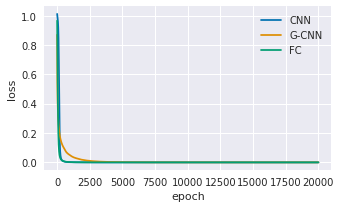

CPU times: user 2min 30s, sys: 4min 27s, total: 6min 57s
Wall time: 1min 23s


In [9]:
%%time
experiment_name = "d8_sparse_w_noise_2"
group = Group('D8')
N = 1 # average over trajectories
force_train = True

ins = torch.stack([group.f_mat[:, 2], group.f_mat[:, 3]])
outs = torch.Tensor([[-1], [1]])

print(f"input: {ins}")

X = np.diag((-1,1) ) @ins.numpy()
dopt = dihedral_opt_program.opt(8, X)
optimal_linearization = torch.Tensor(dopt).cfloat().reshape(-1, 1)
optimal_sparsity_norm = net_schatten_norm(optimal_linearization, group)[0]
print(optimal_sparsity_norm)

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))


nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs, net = plot_schatten_norm_sums_and_loss(nets, group, dataloader=dataloader,
                                            postprocess_fn=postprocess_fn, N=N,
                                            epochs=20_000, cuda=False, lr=0.01, dfs=dfs,
                                            exp_name=experiment_name,
                                            horizontal_lb=optimal_sparsity_norm)

with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

#### D8 G-CNN and 2 Gaussian datapoints 

In [3]:
torch.manual_seed(2)
ins = torch.complex(torch.randn([2, 8]), torch.zeros([2, 8]))
outs = torch.Tensor([[-1], [1]])

Optimal linearization is  tensor([[-0.0394+0.j],
        [ 0.0394+0.j],
        [-0.4984+0.j],
        [ 0.4984+0.j],
        [ 0.4856+0.j],
        [-0.4856+0.j],
        [ 0.1190+0.j],
        [-0.1190+0.j]])
tensor(5.6573)
Will train before plotting.


<timed exec>:10: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811803361/work/aten/src/ATen/native/Copy.cpp:244.)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-21.9897],
        [ 21.5798]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.1199],
        [ 21.8235]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-21.7190],
        [ 21.6642]], grad_fn=<MmBackward0>)
<class 'src.nn_training.conv_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.9387],
        [ 21.8038]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.5901],
        [ 21.9466]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.3969],
        [ 21.9217]], grad_fn=<MmBackward0>)
<class 'src.nn_training.g_net'> did not converge 0 times to get 3 successes.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.1158],
        [ 21.0328]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.0927],
        [ 21.0401]], grad_fn=<MmBackward0>)


  0%|          | 0/20000 [00:00<?, ?it/s]

preds: tensor([[-22.0971],
        [ 21.0368]], grad_fn=<MmBackward0>)
<class 'src.nn_training.fc_net'> did not converge 0 times to get 3 successes.


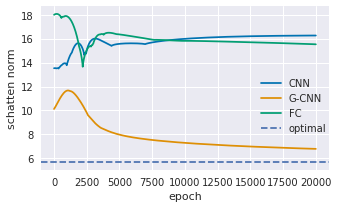

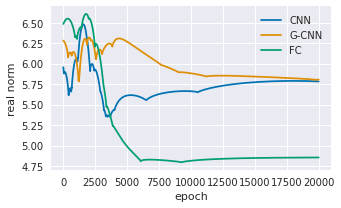

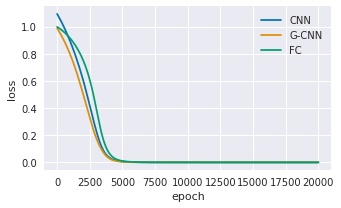

CPU times: user 10min 28s, sys: 23min 48s, total: 34min 16s
Wall time: 16min 29s


In [4]:
%%time
experiment_name = "d8_sparse_gaussian_2"

group = Group('D8')

dataset = TensorDataset(ins.real, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))
X = np.diag((-1,1)) @ ins.numpy()

dopt = dihedral_opt_program.opt(8, X)
optimal_linearization = torch.Tensor(dopt).cfloat().reshape(-1, 1)
print("Optimal linearization is ", optimal_linearization / torch.linalg.vector_norm(optimal_linearization))

optimal_sparsity_norm = net_schatten_norm(optimal_linearization, group)[0]

print(optimal_sparsity_norm)

N = 3 # average over trajectories
force_train = True

nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn, N,
                                       epochs=20_000, cuda=False,
                                       lr=5e-5,  # based
                                       dfs=dfs, exp_name=experiment_name,
                                       horizontal_lb=optimal_sparsity_norm)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)

#### SmallGroup(200, 44) G-CNN and 10 Gaussian datapoints

In [ ]:
%%time
experiment_name = "ccq200_gaussian_10"
group = Group('CCQ200')
k = 5
ins_m = torch.complex(torch.randn([k, 200]) + 1e-2, torch.zeros([k, 200]))
ins_p = torch.complex(torch.randn([k, 200]) - 1e-2, torch.zeros([k, 200]))
ins = torch.cat([ins_m, ins_p])
outs_p = torch.Tensor([[-1]] * k)
outs_m = torch.Tensor([[1]] * k)
outs = torch.cat([outs_m, outs_p])
dataset = TensorDataset(ins, outs)
dataloader = DataLoader(dataset, batch_size=ins.size(0))

N = 10  # average over trajectories
force_train = False

nets = {"CNN": conv_net, "G-CNN": g_net, "FC": fc_net}
dfs = get_training_dataframes(experiment_name, force_train)

dfs = plot_schatten_norm_sums_and_loss(nets, group, dataloader, postprocess_fn,
                                       N, epochs=500, cuda=False, dfs=dfs, exp_name=experiment_name)
with open(f'data/training/{experiment_name}.pickle', 'wb') as f:
    pickle.dump(dfs, f, protocol=pickle.HIGHEST_PROTOCOL)